In [1]:
"""

Karthikeyan Chellamuthu

6-1 (The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong
that skew is…)
"""

'\n\nKarthikeyan Chellamuthu\n\n6-1 (The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong\nthat skew is…)\n'

In [2]:
from __future__ import print_function

import numpy as np

import density
import hinc
import thinkplot
import thinkstats2

In [6]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Mean(xs):
    return RawMoment(xs, 1)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

C:\Users\oneor\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\oneor\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


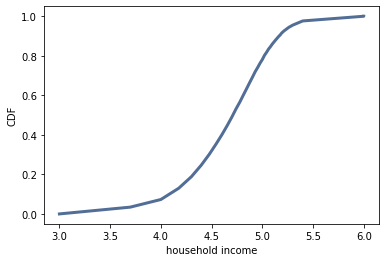

Mean 74278.70753118733
Median 51226.45447894046
Skewness 4.949920244429583
Pearson Skewness 0.7361258019141782
Fraction of household taxable income below the mean 0.660005879566872


<Figure size 576x432 with 0 Axes>

In [13]:
def main():
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper=6.0)

    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')
    
    sample = np.power(10, log_sample)

# Mean
    print("Mean", Mean(sample))
    
# Median
    print("Median", Median(sample))
    
# Skewness
    print("Skewness", Skewness(sample))
    
# Pearson Skewness
    print("Pearson Skewness", PearsonMedianSkewness(sample))
    
# What fraction of households reports a taxable income below the mean?
    cdf = thinkstats2.Cdf(sample)
    print("Fraction of household taxable income below the mean", cdf[Mean(sample)])

if __name__ == "__main__":
    main()

In [14]:
"""
How do the results depend on the assumed upper bound?

With higer upper bound, moment-based skewness increases whereas Pearson skewness decreases. Increasing the upper bound
has modest effect on mean and strongest effect on standard deviation. 
"""


'\nHow do the results depend on the assumed upper bound?\n\nWith higer upper bound, moment-based skewness increases whereas Pearson skewness decreases. Increasing the upper bound\nhas modest effect on mean and strongest effect on standard deviation. \n'